In [1]:
import pandas as pd

In [2]:
from urllib import request
import nltk
# nltk.download()
from nltk.book import *
from nltk import *
from bs4 import BeautifulSoup
import pandas as pd

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
URL = "https://www.ecb.europa.eu/press/accounts/2022/html/ecb.mg220303~7ac13bacbe.en.html"
html = request.urlopen(URL).read().decode('utf8')
html[:60]

'<!DOCTYPE html>\n<html lang="en">\n<head>\n        <meta charse'

In [4]:
raw = BeautifulSoup(html, 'html.parser').get_text()
tokens = word_tokenize(raw)
print(raw.find("March 2022"))
raw = raw[863:]
tokens = word_tokenize(raw)
text = nltk.Text(tokens)
text.concordance('inflation')

10025
Displaying 25 of 168 matches:
sooner . In the euro area , rising inflation compensation had added to the upwa
expectations of the future path of inflation in response to the renewed upside 
to the renewed upside surprises to inflation in December and January . Recent e
 to perceptions in the market that inflation risks were rising . Brent crude oi
ued reappraisal of the medium-term inflation outlook for the euro area . First 
alysts ( SMA ) saw upside risks to inflation over the entire horizon covered by
urvey-based indicators of long-run inflation expectations had been revised up .
 . Likewise , in January long-term inflation expectations from Consensus Econom
rket-based measures of longer-term inflation compensation had remained at aroun
 around 2 % . Furthermore , in the inflation options market , investors were pr
 a probability of around 30 % that inflation over the next five years would , o
ions remained favourable amid high inflation and expectations of continued buoy
nsio

In [5]:
lower_words = [w.lower() for w in text]
sorted(set(lower_words))

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'+",
 "'+e.innerhtml+",
 "'hidecount",
 "'url",
 '(',
 ')',
 '*',
 '**',
 '*/',
 '*a.length',
 '+',
 '+28',
 '+4',
 '+49',
 '+document.location.hostname',
 '+e+',
 '+ecb.currentlanguage+',
 '+i+',
 '+n',
 '+o+',
 '+t+',
 ',',
 '-',
 '-0.9',
 '-1',
 '-1.2',
 '-1===a.getattribute',
 '-1==s.indexof',
 '-20px',
 '-active',
 '-attribution',
 '-daily',
 '-dark-blue',
 '-dark-grey',
 '-gradient-upper',
 '-inner',
 '-light-blue',
 '-light-grey-blue',
 '-transparent-blue',
 '-transparent-light-grey',
 '.',
 '.*',
 '.-is-loading',
 '...',
 '.accordion',
 '.addeventlistener',
 '.address-box',
 '.attribution',
 '.carousel',
 '.children',
 '.classlist.add',
 '.classlist.contains',
 '.connector',
 '.contact-box',
 '.content-box',
 '.definition-list',
 '.explainer-box',
 '.getdate',
 '.header',
 '.html',
 '.indexof',
 '.insertadjacenthtml',
 '.isintersecting',
 '.map',
 '.parentnode.insertbefore',
 '.previouselementsibling',
 '.promo-box',
 '.queryselector

In [6]:
from nltk.probability import FreqDist
fdist = FreqDist(lower_words)
fdist

fdist.N()

fdist['inflation']

fdist.freq('inflation')

In [146]:
links = pd.read_csv('ECB_links.txt', header = None)
links.columns = ['DateIssued', 'DateMet', 'HTTP']
links['DateIssued'] = links['DateIssued'].str.replace('_','-')
links['DateMet'] = links['DateMet'].str.replace('_','-')
links['DateIssued']= pd.to_datetime(links['DateIssued'])
links['DateMet']= pd.to_datetime(links['DateMet'])

links.head()

,DateIssued,DateMet,HTTP
0,2022-04-07,2022-03-10,https://www.ecb.europa.eu/press/accounts/2022...
1,2022-03-03,2022-02-03,https://www.ecb.europa.eu/press/accounts/2022...
2,2022-01-20,2021-12-16,https://www.ecb.europa.eu/press/accounts/2022...
3,2021-11-25,2021-10-28,https://www.ecb.europa.eu/press/accounts/2021...
4,2021-09-07,2021-09-08,https://www.ecb.europa.eu/press/accounts/2021...


In [235]:
import json
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer() 


def basicFreq(link1, myWord, verbose = False):

    URL = link1.strip()
    html = request.urlopen(URL).read().decode('utf8')

    raw = BeautifulSoup(html, 'html.parser').get_text()
    tokens = word_tokenize(raw)

    tokens = word_tokenize(raw)
    text = nltk.Text(tokens)
    lower_words = [w.lower() for w in text]
    #lower_words = [word for word in lower_words if not word in stopwords.words()]
    lower_words = [ps.stem(w) for w in lower_words] 
    
    fdist = FreqDist(lower_words)
    
#     with open('file.txt', 'w') as file:
#         file.write(json.dumps(fdist)) 
    
    if verbose == True:
        print("Number of occurences of: " + myWord + " is " +  str(fdist[myWord]) + " freq: " + str(fdist.freq(myWord)))
        text.concordance(myWord)
        
    return(myWord, fdist[myWord], fdist.freq(myWord))

[nltk_data] Downloading package stopwords to /home/jeff/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [236]:
def countFreq(text, myWord):
    lower_words = [w.lower() for w in text]
    fdist = FreqDist(lower_words)
    fdist[myWord]
    return(fdist.freq(word))

In [ ]:
volatility
inflation
expectations
liquidity

In [244]:
listWords = []
myWord = 'taxes'
myWord = myWord.lower()
myWord = ps.stem(myWord) 

for i in range(0, links.shape[0]):
    link1 = links.iloc[i,2]
    date1 = links.iloc[i,0]
    word, occur, freq = basicFreq(link1, myWord, False)
    listWords.append([date1, word, occur, freq])
    

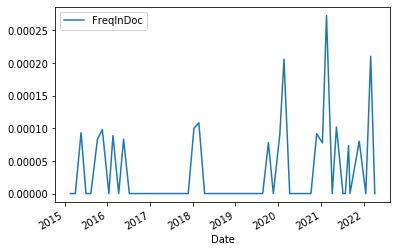

In [245]:
#Plot

df1 = pd.DataFrame(listWords, columns=['Date', 'Word', 'Occurences', 'FreqInDoc'])

plt1 = df1[['Date', 'FreqInDoc']]

plt1.set_index("Date", inplace = True)

plt1.plot()